# Pymaceuticals Inc.
Analysis
•	Treatments with Capomulin resulted in similar final tumor weights compared to treatments with Ramicane and smaller final tumor volumes compared to treatment with Infubinol and Ceftamin
•	Smallest tumor volume with the Capomulin treatment occured at approximately 35 days and then began increasing again with additional treatment days
•	There is a positive correlation between mice weight and average tumor volume on the Capomulin treatment


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding = "utf-8")
study_results = pd.read_csv(study_results_path, encoding = "utf-8")

# Combine the data into a single dataset
mouse_results_df = pd.merge(study_results, mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
mouse_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = len(mouse_results_df["Mouse ID"].unique())
print(f"The number of mice in the merged dataset is {mice_count}")

The number of mice in the merged dataset is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_results_df[mouse_results_df.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate_mice_time = duplicates["Mouse ID"].unique()
print(f"The duplicate mice in the merged database are {duplicate_mice_time}")

The duplicate mice in the merged database are ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_results_df[mouse_results_df.duplicated(["Mouse ID"],keep=False)]

only_duplicate_mice = duplicate_mice.loc[duplicate_mice["Mouse ID"]=="g989",:]
only_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_cleaned_df = mouse_results_df.loc[mouse_results_df["Mouse ID"] != "g989",:]
results_cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(results_cleaned_df["Mouse ID"].unique())
print(f"The number of mice in the cleaned dataset is {mice_count}")

The number of mice in the cleaned dataset is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Calculate statistics
tumor_avg = results_cleaned_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = results_cleaned_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = results_cleaned_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_stdev = results_cleaned_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = results_cleaned_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#Put statistics into a dataframe
drug_summary_df = pd.DataFrame(
    {"Mean Tumor Volume" : tumor_avg,
     "Median Tumor Volume" : tumor_median,
     "Tumor Volume Variance" : tumor_var,
     "Tumor Volume Std. Dev." : tumor_stdev,
     "Tumor Volume Std Err." : tumor_sem}
)

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_data = results_cleaned_df.groupby(["Drug Regimen"]).agg \
    ({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_agg_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

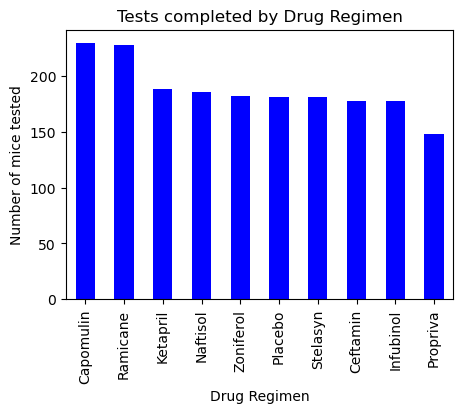

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Set up dataframe to count the timepoints by drug and sort the data
mice_tested_df = results_cleaned_df.groupby(["Drug Regimen"]).count() \
    .sort_values("Timepoint", ascending=False)

timepoint_plt_df = mice_tested_df[["Timepoint"]]

#Create the plot
timepoint_plt_df.plot(kind="bar",figsize=(5, 3.5), title="Tests completed by Drug Regimen", color="b",
                      legend=False, ylabel="Number of mice tested")

plt.show()

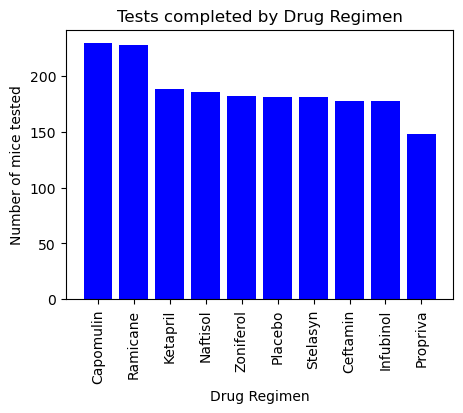

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#set up axis values
y_axis = results_cleaned_df.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)
x_axis = y_axis.index

#set plot size, plot the chart, and set x-axis to vertical
plt.figure(figsize=(5, 3.5))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(rotation="vertical")

#add titles & labels
plt.title("Tests completed by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

plt.show()


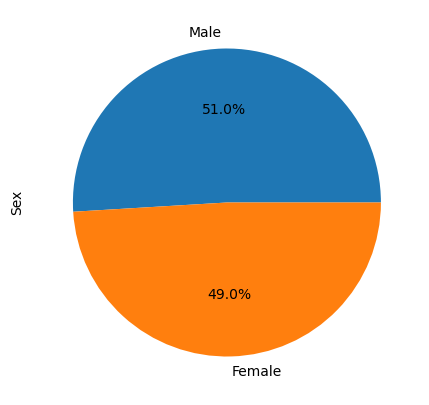

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_mice = results_cleaned_df["Sex"].value_counts()
sex_mice_count = pd.DataFrame(sex_mice)
sex_mice_count

plot = sex_mice_count.plot.pie(y="Sex", figsize = (5,5), autopct = "%.1f%%",legend = False)

Text(0, 0.5, 'Sex')

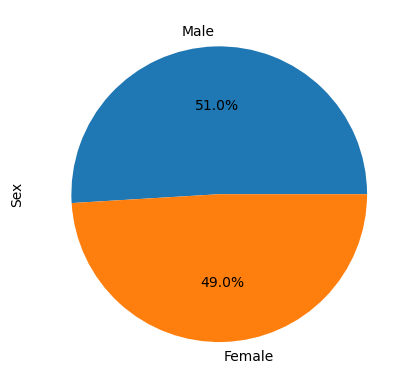

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set up axis values
sex_values = results_cleaned_df["Sex"].value_counts()
pie_labels = sex_values.index

plt.pie(sex_values, labels=pie_labels, autopct="%1.1f%%")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = results_cleaned_df.groupby(["Mouse ID"]).last()["Timepoint"]

last_timepoint_df = pd.DataFrame(last_timepoint)
print(last_timepoint_df.head())


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_data_df = pd.merge(last_timepoint_df, results_cleaned_df,  how='left', on=["Mouse ID","Timepoint"])
final_data_topdrug = final_data_df.loc[(final_data_df["Drug Regimen"] == "Capomulin") | 
                                       (final_data_df["Drug Regimen"] == "Ramicane") |
                                       (final_data_df["Drug Regimen"] == "Infubinol") |
                                       (final_data_df["Drug Regimen"] == "Ceftamin"), :]
final_data_df

          Timepoint
Mouse ID           
a203             45
a251             45
a262             45
a275             45
a366             30


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_names:
    drug_list = final_data_df.loc[(final_data_df["Drug Regimen"] == drug),"Tumor Volume (mm3)"].tolist()
    tumor_volume.append(drug_list)
    
    # add subset 
tumor_data_df = pd.DataFrame(
    {"Capomulin" : tumor_volume[0],
     "Ramicane" : tumor_volume[1],
     "Infubinol" : tumor_volume[2],
     "Ceftamin" : tumor_volume[3]}
)
  
    # Determine outliers using upper and lower bounds
for drug in drug_names:
    lowerq = tumor_data_df[drug].quantile([.25,.75])[0.25]
    upperq = tumor_data_df[drug].quantile([.25,.75])[0.75]
    iqr = upperq - lowerq
    lower_bounds = lowerq - (1.5*iqr)
    upper_bounds = upperq + (1.5*iqr)

    outliers = tumor_data_df.loc[(tumor_data_df[drug] < lower_bounds) | (tumor_data_df[drug] > upper_bounds),
                                 drug]

    print(f"{drug}'s potential Tumor Volume (mm3) outliers: {outliers} ")

Capomulin's potential Tumor Volume (mm3) outliers: Series([], Name: Capomulin, dtype: float64) 
Ramicane's potential Tumor Volume (mm3) outliers: Series([], Name: Ramicane, dtype: float64) 
Infubinol's potential Tumor Volume (mm3) outliers: 5    36.321346
Name: Infubinol, dtype: float64 
Ceftamin's potential Tumor Volume (mm3) outliers: Series([], Name: Ceftamin, dtype: float64) 


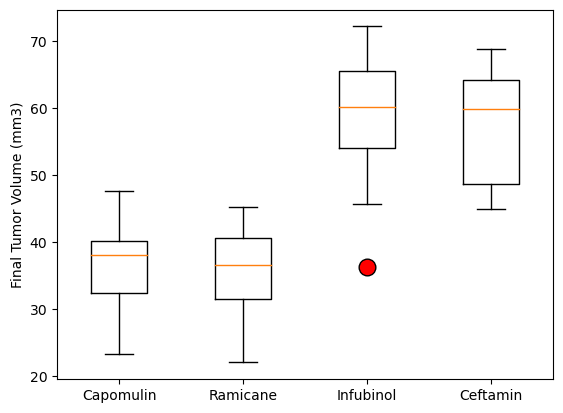

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
flierprops = dict(marker ="o", markerfacecolor='r', markersize=12)
ax1.boxplot(tumor_data_df, flierprops = flierprops)
ax1.set_xticklabels(drug_names)
ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.show()


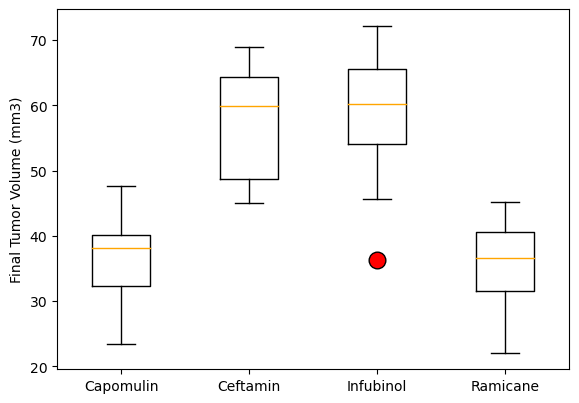

In [17]:
#Alternate way using pandas plot

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
medianprops = dict(linestyle='-', linewidth=1, color="orange")
flierprops = dict(marker ="o", markerfacecolor='r', markersize=12)
b_plot = final_data_topdrug.boxplot(column = "Tumor Volume (mm3)", by = "Drug Regimen", grid = False, 
                                    color = "black", medianprops = medianprops, flierprops = flierprops)
b_plot.plot()

plt.suptitle("")
plt.title("")
b_plot.set_xlabel("")
b_plot.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

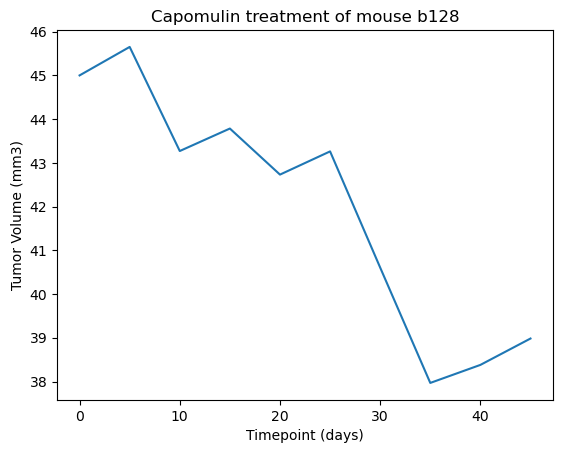

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#find a mouse treated with Capomulin with max data points
mouse_capomulin = results_cleaned_df.loc[(results_cleaned_df["Drug Regimen"] == "Capomulin"),:]
mouse_capomulin_count = mouse_capomulin.groupby(["Mouse ID"]).count()["Timepoint"]


#get data from chosen mouse
Capomulin_mouse_time = mouse_capomulin.loc[(mouse_capomulin["Mouse ID"] == "b128"),
                                           ["Timepoint","Tumor Volume (mm3)"]]

#Create line plot
line_plot = Capomulin_mouse_time.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", legend = False)
line_plot.plot
line_plot.set_ylabel("Tumor Volume (mm3)")
line_plot.set_xlabel("Timepoint (days)")
line_plot.set_title("Capomulin treatment of mouse b128")

plt.show()

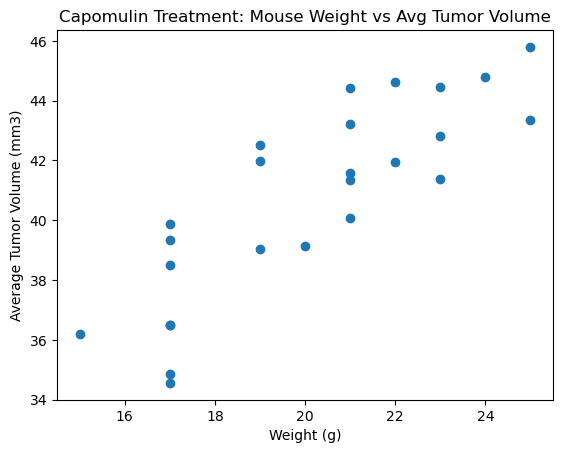

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight = mouse_capomulin.groupby(["Mouse ID"]).mean()["Weight (g)"]
capomulin_vol = mouse_capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

plt.scatter(capomulin_weight, capomulin_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Mouse Weight vs Avg Tumor Volume")


plt.show()

## Correlation and Regression

The correlation between mouse weight & average tumor volume is 0.84


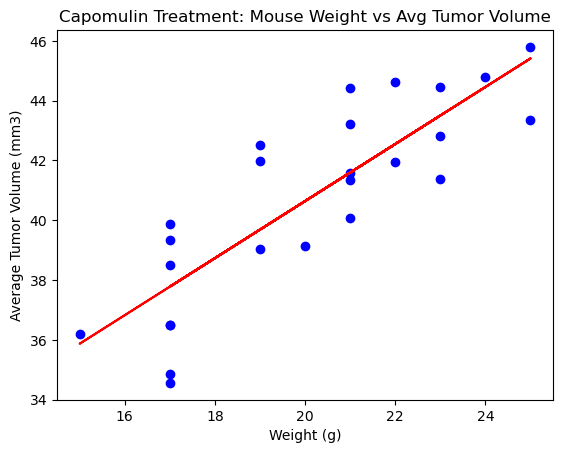

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate correlation & print
correlation = st.pearsonr(capomulin_weight, capomulin_vol)
print(f"The correlation between mouse weight & average tumor volume is {round(correlation[0],2)}")

#Set values for plotting
x_values = capomulin_weight
y_values = capomulin_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Plot the raw data and regression line
plt.scatter(x_values, y_values, color = "blue")
plt.plot(x_values,regress_values, color = "red")

#Add titles & labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment: Mouse Weight vs Avg Tumor Volume")

plt.show()
